In [17]:
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
model = tf.global_variables_initializer()
df = pd.read_csv("price_data.csv", sep=",")

df

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20100101,-4.9,-11.0,0.9,0.0,2123
1,20100102,-3.1,-5.5,5.5,0.8,2123
2,20100103,-2.9,-6.9,1.4,0.0,2123
3,20100104,-1.8,-5.1,2.2,5.9,2020
4,20100105,-5.2,-8.7,-1.8,0.7,2060
...,...,...,...,...,...,...
2917,20171227,-3.9,-8.0,0.7,0.0,2865
2918,20171228,-1.5,-6.9,3.7,0.0,2884
2919,20171229,2.9,-2.1,8.0,0.0,2901
2920,20171230,2.9,-1.6,7.1,0.6,2901


In [19]:
xy=np.array(df, dtype=np.float32)
xy

array([[ 2.0100100e+07, -4.9000001e+00, -1.1000000e+01,  8.9999998e-01,
         0.0000000e+00,  2.1230000e+03],
       [ 2.0100102e+07, -3.0999999e+00, -5.5000000e+00,  5.5000000e+00,
         8.0000001e-01,  2.1230000e+03],
       [ 2.0100104e+07, -2.9000001e+00, -6.9000001e+00,  1.4000000e+00,
         0.0000000e+00,  2.1230000e+03],
       ...,
       [ 2.0171228e+07,  2.9000001e+00, -2.0999999e+00,  8.0000000e+00,
         0.0000000e+00,  2.9010000e+03],
       [ 2.0171230e+07,  2.9000001e+00, -1.6000000e+00,  7.0999999e+00,
         6.0000002e-01,  2.9010000e+03],
       [ 2.0171232e+07,  2.0999999e+00, -2.0000000e+00,  5.8000002e+00,
         4.0000001e-01,  2.9010000e+03]], dtype=float32)

In [20]:
x_data = xy[:, 1:-1]
y_data = xy[:, [-1]]

In [21]:
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4,1], name="weight"))
b = tf.Variable(tf.random_normal([1]), name="bias")

In [22]:
hypothesis = tf.matmul(X, W)+b

In [23]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00005)
train = optimizer.minimize(cost)

In [25]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [27]:
for step in range(0, 100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
#     if step % 500 == 0:
#         print("#", step, "손실비용: ", cost_)
#         print("- 배추가격: ", hypo_[0])

In [28]:
saver = tf.train.Saver()
save_path = saver.save(sess, "./saved.cpkt")
print("학습된 모델 저장")
tf.reset_default_graph()

학습된 모델 저장


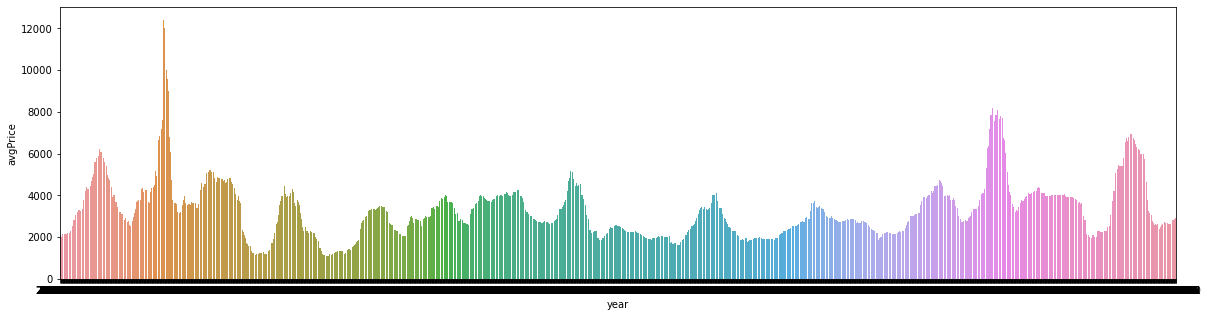

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(x="year", y="avgPrice", data=df)
plt.show()

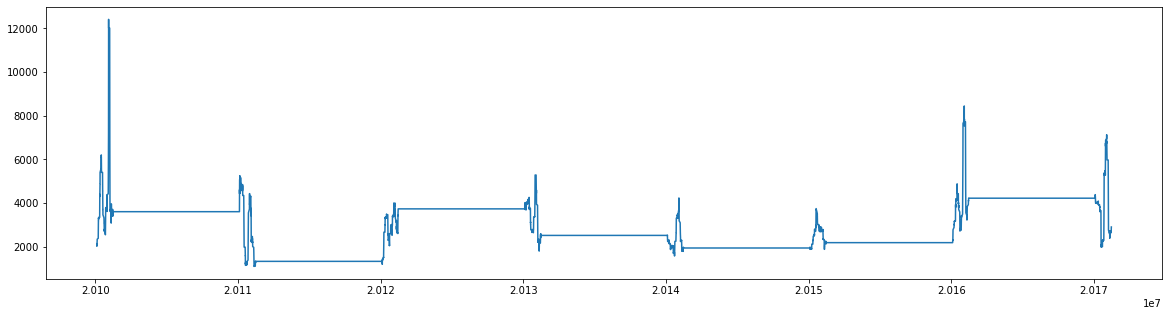

In [30]:
plt.figure(figsize=(20, 5))
plt.plot(df.year, df.avgPrice)
plt.show()

In [31]:
df.year

0       20100101
1       20100102
2       20100103
3       20100104
4       20100105
          ...   
2917    20171227
2918    20171228
2919    20171229
2920    20171230
2921    20171231
Name: year, Length: 2922, dtype: int64

In [32]:
df.avgPrice

0       2123
1       2123
2       2123
3       2020
4       2060
        ... 
2917    2865
2918    2884
2919    2901
2920    2901
2921    2901
Name: avgPrice, Length: 2922, dtype: int64